<a href="https://colab.research.google.com/github/mylethidiem/ProgramingTech/blob/main/preAIO25/warmup/exercise_w6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **W6**

## **Simple Linear Regression**

#### Basic concept

$$
\text{Probability density function:} \\
\hat{y}=wx+b \\
\text{where } \hat{y} \text{ is a predicted value,} \\
w \text{ and } b \text{ are parameters} \\
\text{and } x \text{ is input feature}
$$

$$
\text{Error (loss) computation} \\
\text{Idea: compare predicted values } \hat{y} \text{ and label values } y \\
\text{Square loss:} \\
L(\hat{y},y) = (\hat{y} - y)^2
$$

$$
\text{Find better w and b} \\
\text{Use gradient descent to minimize the loss function} \\
\text{Compute derivate for each parameter:} \\
\frac{\partial L}{\partial w} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial w}=2x(\hat{y}-y) \\
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial b} = 2(\hat{y} -y) \\
\text{Update parameters: } \\
w = w-\eta \frac{\partial L}{\partial w},
b = b-\eta \frac{\partial L}{\partial b}
$$

 Introduce to data

 Prepare data

In [22]:
import pandas as pd

# Download the file if it's not already present.  Replace with your actual file path if needed
!gdown 1pG8W4Bwz5KSWND-fydluuwocVtys96pq

# Load the data into a pandas DataFrame. Replace 'advertising.csv' with the actual filename if needed
try:
    df = pd.read_csv('advertising.csv')  # Assumes the file is named advertising.csv
    # Show the first 5 rows (head) of the DataFrame
    print(df.head())

    # Show the last 5 rows (tail) of the DataFrame
    print(df.tail())

    # Show some specific rows (e.g., rows 10 to 14)
    print(df.iloc[10:15])

except FileNotFoundError:
    print("Error: 'advertising.csv' not found. Please make sure the file is in the current directory or provide the correct path.")
except pd.errors.EmptyDataError:
    print("Error: 'advertising.csv' appears to be empty.")
except pd.errors.ParserError:
    print("Error: Could not parse 'advertising.csv'. Please check its format.")

Downloading...
From: https://drive.google.com/uc?id=1pG8W4Bwz5KSWND-fydluuwocVtys96pq
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 10.5MB/s]
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
        TV  Radio  Newspaper  Sales
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4
       TV  Radio  Newspaper  Sales
10   66.1    5.8       24.2   12.6
11  214.7   24.0        4.0   17.4
12   23.8   35.1       65.9    9.2
13   97.5    7.6        7.2   13.7
14  204.1   32.9       46.0   19.0


In [23]:
#dataset
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, col_index):
  return [row[col_index] for row in data]

def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1)
  tv_data = get_column(data, 0)
  radio_data = get_column(data, 1)
  newspaper_data = get_column(data, 2)
  sales_data = get_column(data, 3)
  print(f"tv_data = {tv_data}")
  print(f"radio_data = {radio_data}")
  print(f"newspaper_data = {newspaper_data}")
  print(f"sales_data = {sales_data}")

  # build X input and y output for training
  X = [tv_data, radio_data, newspaper_data]
  y = sales_data

  return X,y

In [24]:
# question 1
X, y = prepare_data('advertising.csv')
data_list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(data_list)

tv_data = [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7, 23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4, 237.4, 13.2, 228.3, 62.3, 262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9, 97.2, 265.6, 95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6, 206.9, 25.1, 175.1, 89.7, 239.9, 227.2, 66.9, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9, 7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1, 69.0, 31.5, 139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 129.4, 213.4, 16.9, 27.5, 120.5, 5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7, 88.3, 109.8, 134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4, 225.8, 241.7, 175.7, 209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 18.8, 224.0, 123.1, 229.5, 87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9, 48.3, 25.6, 273.7, 43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 240.1, 243.2, 38.0, 44.7, 28

Training

In [25]:

# initialize paramaters  tại sao lại khởi tạo như vậy
def initialize_params():
  w1 = random.gauss(mu=0.0, sigma=0.01)
  w2 = random.gauss(mu=0.0, sigma=0.01)
  w3 = random.gauss(mu=0.0, sigma=0.01)
  b = 0
  return w1, w2, w3, b

In [26]:
def initialize_params_hard_code():
  w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
  return w1, w2, w3, b


In [27]:
# predict values
def predict(w1, w2, w3, b, x1, x2, x3):
  return w1*x1 + w2*x2 + w3*x3 + b

In [28]:
# compute loss
def compute_loss(y_hat, y):
  return (y_hat - y)**2

In [29]:
# compute gradient
def compute_gradient_wi(y_hat, y, xi):
  dwi = 2*(y_hat - y)*xi
  return dwi

In [30]:
def compute_gradient_b(y_hat, y):
  db = 2*(y_hat - y)
  return db

In [31]:
def compute_gradient(y_hat, y, x1, x2, x3):
  dw1 = compute_gradient_wi(y_hat, y, x1)
  dw2 = compute_gradient_wi(y_hat, y, x2)
  dw3 = compute_gradient_wi(y_hat, y, x3)

  db = compute_gradient_b(y_hat, y)
  return dw1, dw2, dw3, db

In [32]:
def update_params_wi(wi, dwi,lr):
  wi = wi - lr*dwi
  return wi

def update_params_b(b, db, lr):
  b = b - lr*db
  return b

In [33]:
# update wights, bias
def update_params(w1, w2, w3, b, dw1, dw2, dw3, db, lr):
  w1 = update_params_wi(w1, dw1, lr)
  w2 = update_params_wi(w2, dw2, lr)
  w3 = update_params_wi(w3, dw3, lr)
  b = update_params_b(b, db, lr)
  return w1, w2, w3, b

$$
\text{Step for implement train linear regression model} \\
\text{1) Pick a sample }(x_1,x_2,x_3,y)\text{ from training data} \\
\text{2) Compute the output }\hat{y} \\
\hat{y} = w_1*x_1+ w_2*x_2+ w_3*x_3 +b \\
\text{3) Compute loss} \\
L = (\hat{y}-y)^2 \\
\text{4) Compute derivative} \\
\frac{\partial L}{\partial w_1}=2x_1(\hat{y}-y) , \frac{\partial L}{\partial w_2}=2x_2(\hat{y}-y) \\
\frac{\partial L}{\partial w_3}=2x_3(\hat{y}-y), \frac{\partial L}{\partial b}=2(\hat{y}-y) \\
\text{5) Update parameters} \\
w_1=w_1-\eta \frac{\partial L}{\partial w_1},w_2=w_2-\eta \frac{\partial L}{\partial w_2} \\
w_3=w_3-\eta \frac{\partial L}{\partial w_3},b=b-\eta \frac{\partial L}{\partial b}
$$

In [34]:
# implement linear regression
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
  #initialize params
  losses = []
  w1, w2, w3, b = initialize_params()

  #train N sameple with `eporch` times
  N = len(y_data)
  for epoch in range(epoch_max):
    for i in range(N):
      #first get the input features
      x1 = X_data[0][i] #tv
      X2 = X_data[1][i] #radio
      X3 = X_data[2][i] #newspaper
      y = y_data[i] #output sales

      #predict
      y_hat = predict(w1, w2, w3, b, x1, X2, X3)

      #compute loss
      loss = compute_loss(y_hat, y)

      #compute gradient
      dw1, dw2, dw3, db = compute_gradient(y_hat, y, x1, X2, X3)

      #update params
      w1, w2, w3, b = update_params(w1, w2, w3, b, dw1, dw2, dw3, db, lr)

      # logging the loss
      losses.append(loss)

  return w1, w2, w3, b, losses


In [35]:
#question 2
y_hat = predict(w1=0, w2=0.5, w3=0, b=0.5, x1=1, x2=1,x3=1)
print(y_hat)

1.0


In [36]:
l = compute_loss(y_hat=1, y=0.5)
print(l)

0.25


In [37]:
#question 4
#loss function
g_wi = compute_gradient_wi(y_hat=0.5, y=1, xi=1)
print(g_wi)

#question 5
g_b = compute_gradient_b(y_hat=0.5, y=2)
print(g_b)

#question 6
after_wi = update_params_wi(wi=1, dwi=-0.5, lr=1e-5)
print(after_wi)

#question 7
after_b = update_params_b(b=0.5, db=-1, lr=1e-5)
print(after_b)



-1.0
-3.0
1.000005
0.50001


In [38]:
#question 8
X, y = prepare_data('advertising.csv')
w1, w2, w3, b, losses = implement_linear_regression(X, y)
print(w1, w2, w3, b)
print(round(w1,3), round(w2,3), round(w3,3), round(b,3))

#question 9
# give new data
tv = 19.2
radio = 35.9
newspaper = 51.3

X,y = prepare_data('advertising.csv')
(w1,w2,w3,b,losses) = implement_linear_regression(X,y)
sales = predict(w1, w2, w3, b, tv, radio, newspaper)
print(f"predict sales is {sales}")
print(round(sales,2))

tv_data = [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7, 23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4, 237.4, 13.2, 228.3, 62.3, 262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9, 97.2, 265.6, 95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6, 206.9, 25.1, 175.1, 89.7, 239.9, 227.2, 66.9, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9, 7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1, 69.0, 31.5, 139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 129.4, 213.4, 16.9, 27.5, 120.5, 5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7, 88.3, 109.8, 134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4, 225.8, 241.7, 175.7, 209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 18.8, 224.0, 123.1, 229.5, 87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9, 48.3, 25.6, 273.7, 43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 240.1, 243.2, 38.0, 44.7, 28

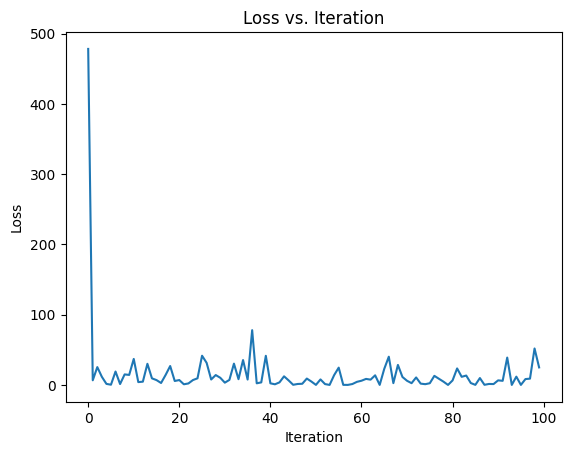

In [39]:
import matplotlib.pyplot as plt

# Assuming 'losses' is the list of loss values from your linear regression
# Replace this with your actual losses if it's named differently

# Example losses (replace with your actual losses)
# w1, w2, w3, b, losses = implement_linear_regression(X, y)


# Create the plot
plt.plot(losses[:100])

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')

# Display the plot
plt.show()

Example write Latex in Jupyter notebook

$$
\begin{align}
\text{Probability density function:}\\
\begin{cases}
\frac{1}{b-a}&\text{for $x\in[a,b]$}\\
0&\text{otherwise}\\
\end{cases}
\\
\text{Cumulative distribution function:}\\
\begin{cases}
0&\text{for $x<a$}\\
\frac{x-a}{b-a}&\text{for $x\in[a,b)$}\\
1&\text{for $x\ge b$}\\
\end{cases}
\end{align}
\\
F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx
$$

In [40]:
from IPython.display import Math
Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

<IPython.core.display.Math object>